# ***#import  libraries***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# ***#uploading data***

In [5]:
path="/content/drive/MyDrive/Data set/healthcare_dataset.csv"
df=pd.read_csv(path)

# ***#data exploration***

In [44]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount Room Number Admission Type Discharge Date   Medication  \
0     18856.28131         328         Urgent     2024-02-02  Paracetamol   
1     33643.32729         265      Emergency     2019-08-26    Ibuprofen   
2     27955.09608         205      Emergency     2022-10-07      Aspirin   
3     37909.78241         450       Elective     2020-12-18    Ibuprofen   
4     14238.31781         458         Urgent     2022-10-09   Penicillin   

   Test Results  Length of Stay  
0        Normal               2  
1  Inconclusive               6  
2        Normal              15  
3      Abnormal              30  
4      Abnormal              20

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  category      
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  object        
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [14]:
df.describe()

Age              Date of Admission  Billing Amount  \
count  55500.000000                          55500    55500.000000   
mean      51.539459  2021-11-01 01:02:22.443243008    25589.983413   
min       13.000000            2019-05-08 00:00:00        9.238787   
25%       35.000000            2020-07-28 00:00:00    13324.875530   
50%       52.000000            2021-11-01 00:00:00    25538.297045   
75%       68.000000            2023-02-03 00:00:00    37820.508432   
max       89.000000            2024-05-07 00:00:00    52764.276740   
std       19.602454                            NaN    14164.855290   

                      Discharge Date  
count                          55500  
mean   2021-11-16 13:15:20.821621504  
min              2019-05-09 00:00:00  
25%              2020-08-12 00:00:00  
50%              2021-11-17 00:00:00  
75%              2023-02-18 00:00:00  
max              2024-06-06 00:00:00  
std                              NaN

# ***#reprocessing operation***

In [9]:
df['Room Number'] = df['Room Number'].astype(str)

In [10]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [11]:
df['Gender'] = df['Gender'].astype('category')

In [12]:
median_billing = df['Billing Amount'].median()
df['Billing Amount'] = df['Billing Amount'].apply(lambda x: median_billing if x < 0 else x)

In [15]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

# ***#Analysis***

In [16]:
correlation_table = pd.crosstab(df['Gender'], df['Medical Condition'])
correlation_table

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Gender                                                                       
Female                  4686    4553    4602      4651          4612     4622
Male                    4622    4632    4625      4653          4633     4609

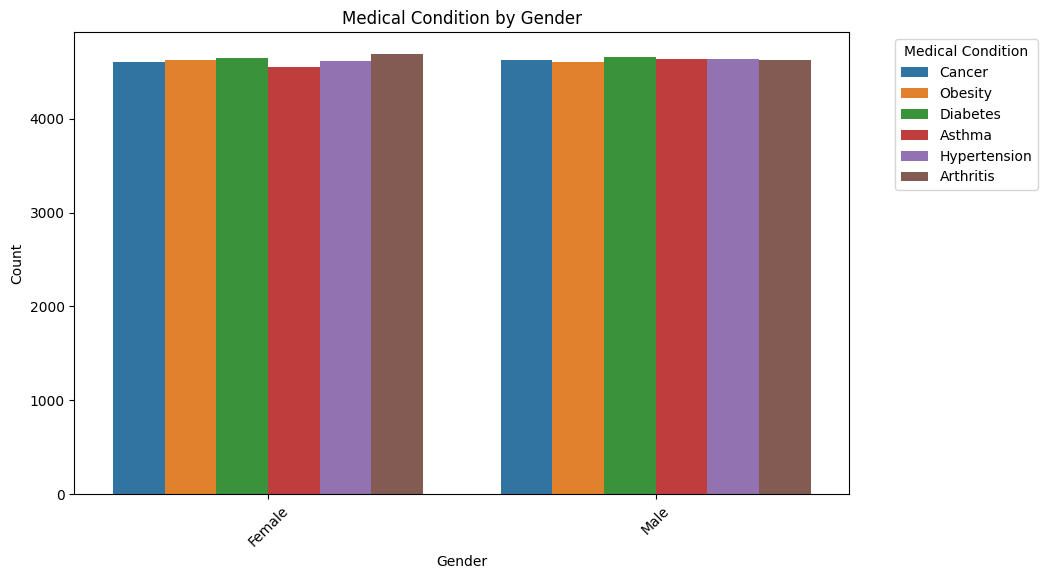

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Medical Condition', data=df)
plt.title('Medical Condition by Gender')
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [18]:
correlation_table = pd.crosstab(df['Blood Type'], df['Medical Condition'])
correlation_table

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Blood Type                                                                   
A+                      1116    1135    1185      1213          1128     1179
A-                      1153    1173    1134      1167          1199     1143
AB+                     1130    1189    1112      1173          1215     1128
AB-                     1192    1134    1198      1139          1125     1157
B+                      1201    1108    1196      1188          1103     1149
B-                      1169    1119    1144      1151          1173     1188
O+                      1198    1173    1108      1151          1157     1130
O-                      1149    1154    1150      1122          1145     1157

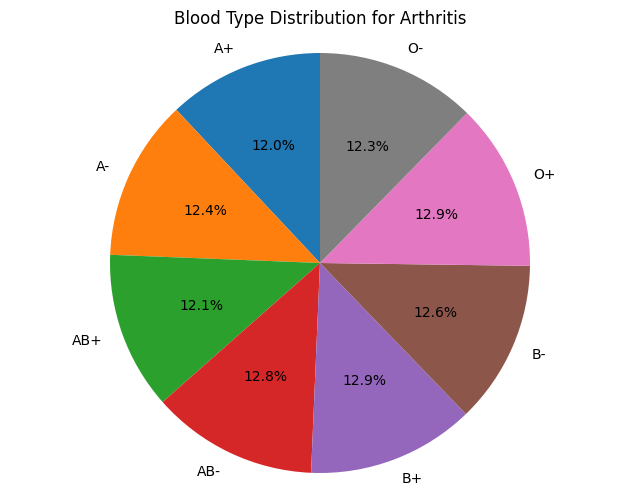

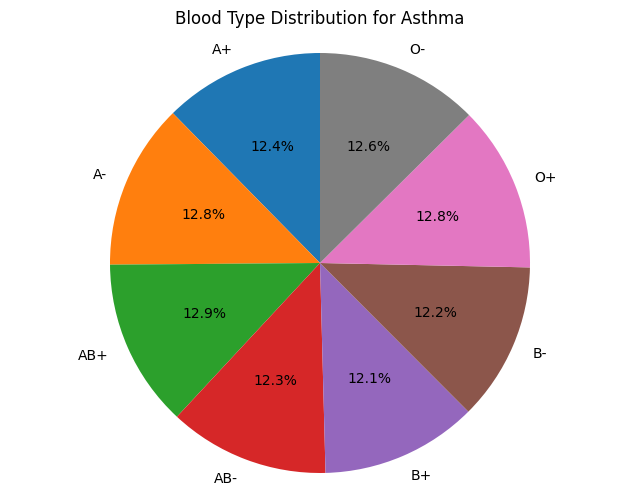

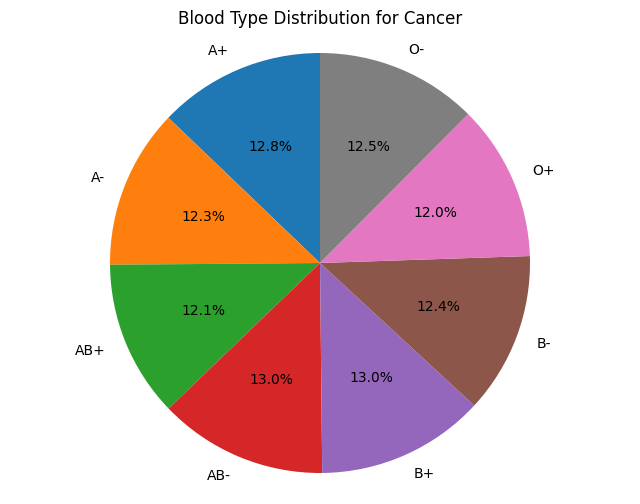

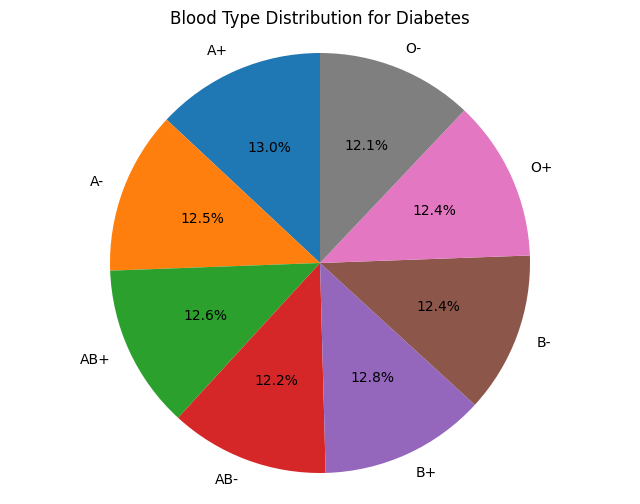

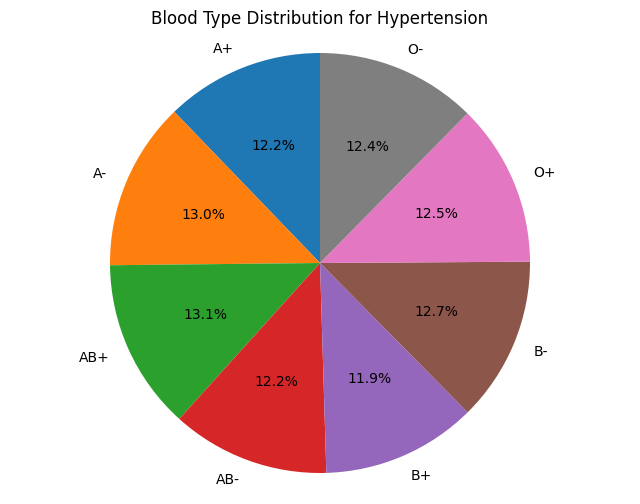

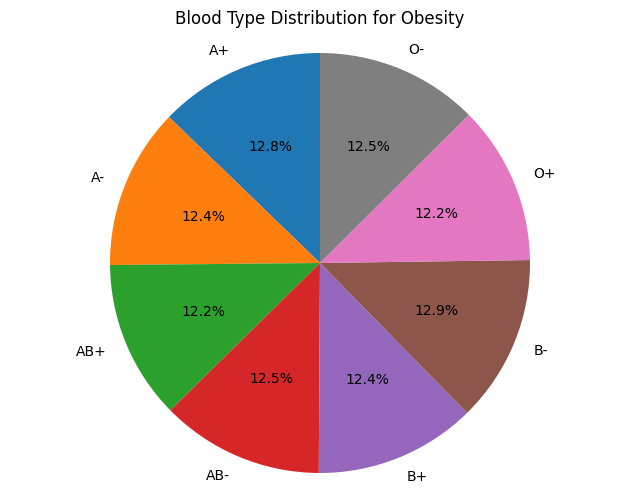

In [19]:
correlation_table = pd.crosstab(df['Blood Type'], df['Medical Condition'])

for condition in correlation_table.columns:
    plt.figure(figsize=(8, 6))
    plt.pie(correlation_table[condition], labels=correlation_table.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Blood Type Distribution for {condition}')
    plt.axis('equal')
    plt.show()

In [20]:
# Grouping data by 'Age' and 'Medical Condition'
grouped_data = df.groupby(['Age', 'Medical Condition']).size().reset_index(name='Count')
grouped_data

Age Medical Condition  Count
0     13         Arthritis      2
1     13            Asthma      3
2     13            Cancer      2
3     13      Hypertension      1
4     13           Obesity      6
..   ...               ...    ...
456   89            Asthma      1
457   89            Cancer      1
458   89          Diabetes      1
459   89      Hypertension      2
460   89           Obesity      1

[461 rows x 3 columns]

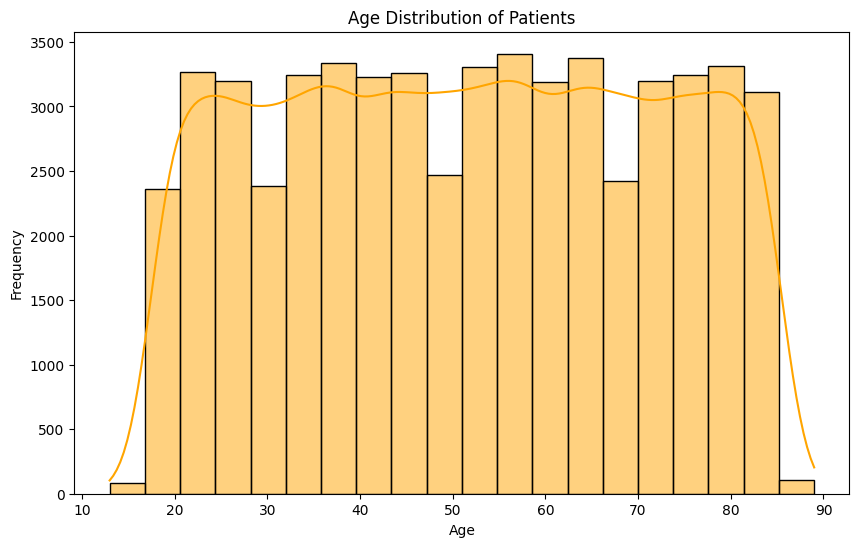

In [21]:
# Histogram for Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='orange')

plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

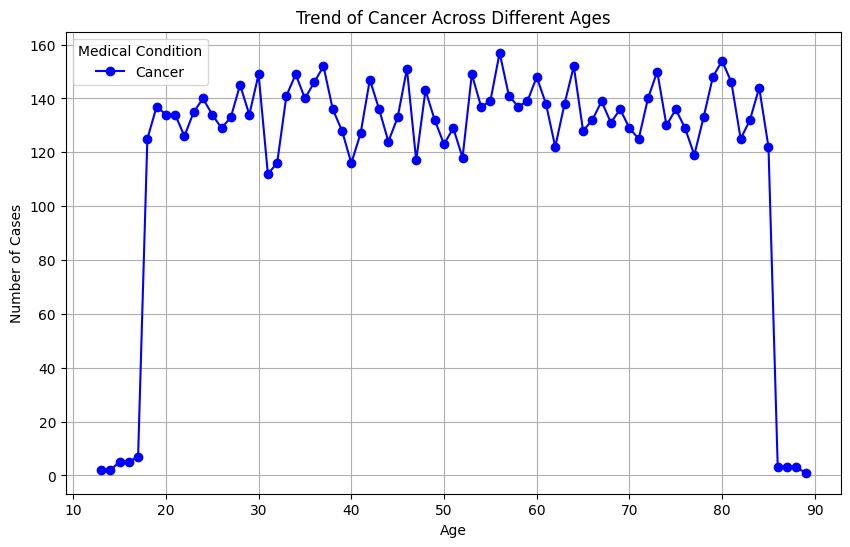

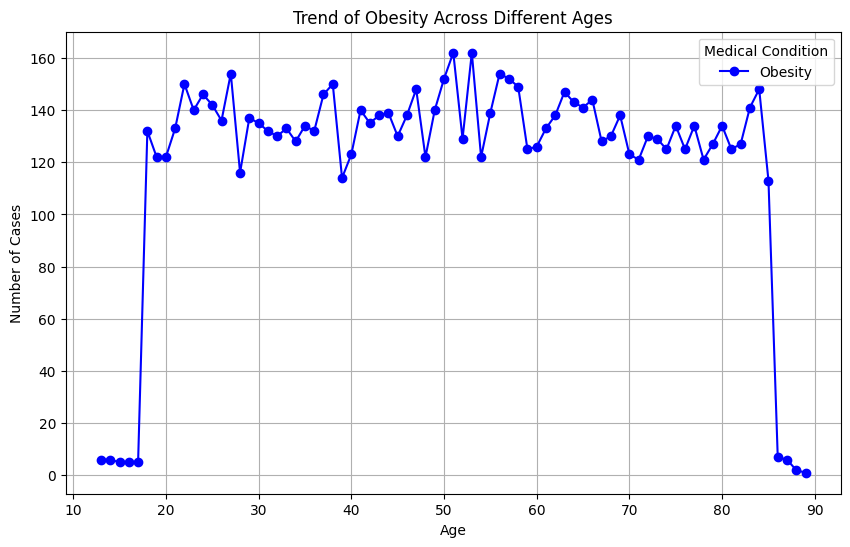

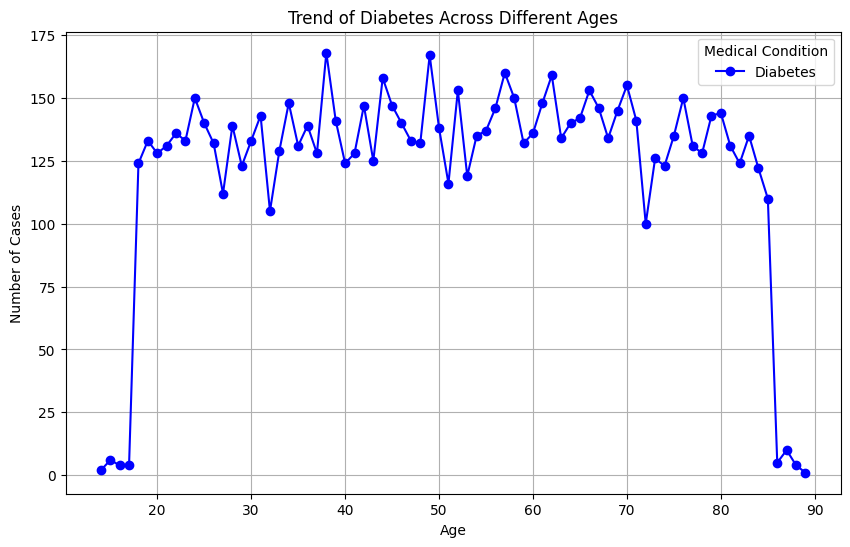

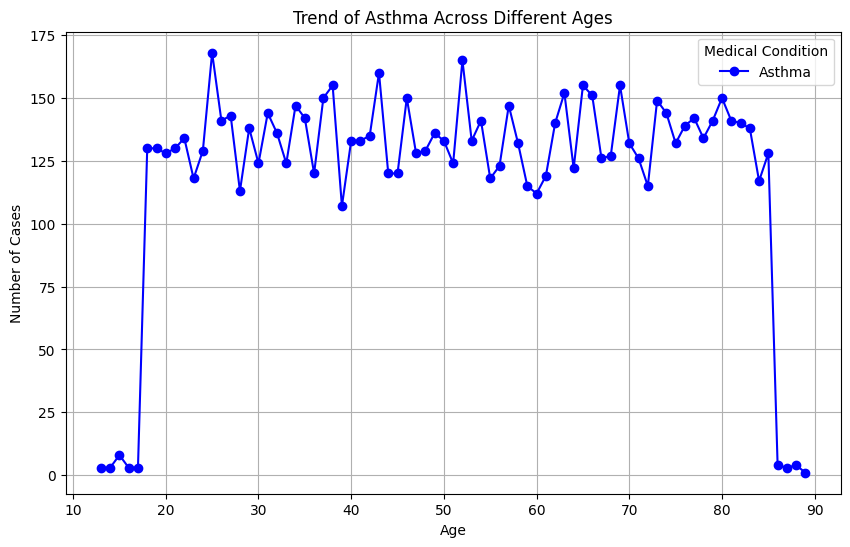

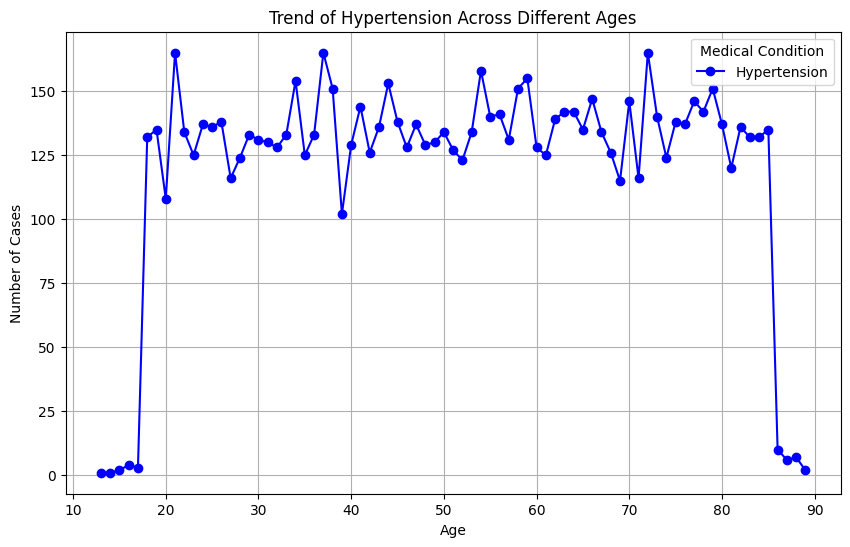

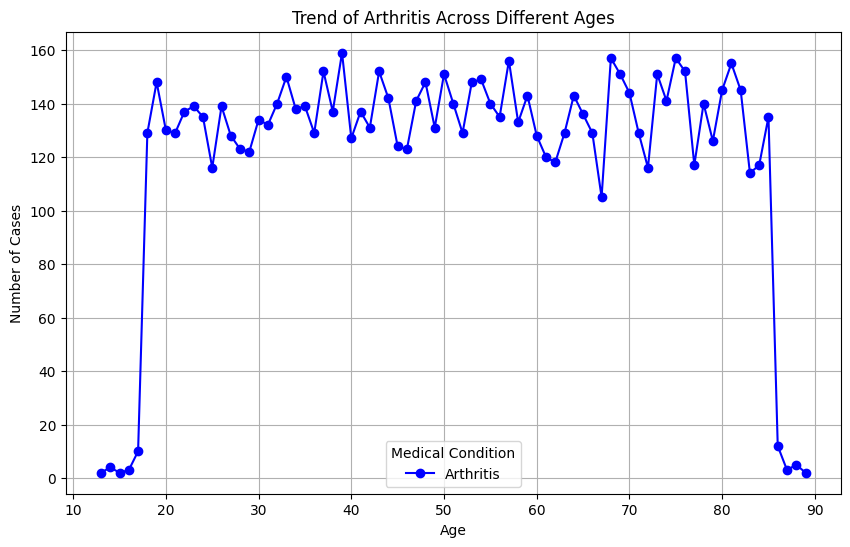

In [22]:
# Grouping data by 'Age' and 'Medical Condition'
grouped_data = df.groupby(['Age', 'Medical Condition']).size().reset_index(name='Count')

# Creating a plot for each medical condition
unique_conditions = df['Medical Condition'].unique()

for condition in unique_conditions:
    # Filtering the grouped data for the specific condition
    condition_data = grouped_data[grouped_data['Medical Condition'] == condition]

    # Plotting the trend of the specific condition across different ages
    plt.figure(figsize=(10, 6))
    plt.plot(condition_data['Age'], condition_data['Count'], marker='o', linestyle='-', label=condition, color='b')

    plt.xlabel('Age')
    plt.ylabel('Number of Cases')
    plt.title(f'Trend of {condition} Across Different Ages')
    plt.legend(title='Medical Condition')
    plt.grid(True)
    plt.show()

In [23]:
average_billing = df.groupby('Hospital')['Billing Amount'].mean()
average_billing

Hospital
Abbott Inc                       38052.04192
Abbott Ltd                       29877.58648
Abbott Moore and Williams,       24799.59634
Abbott and Thompson, Sullivan    16738.56976
Abbott, Peters and Hoffman       18842.39686
                                    ...     
and Zimmerman Sons               32706.65262
and Zuniga Davis Carlson,        42867.04130
and Zuniga Francis Peterson,     33689.63073
and Zuniga Sons                  33950.17048
and Zuniga Thompson, Blake       22067.42876
Name: Billing Amount, Length: 39876, dtype: float64

In [24]:
# Grouping by hospital and calculating the mean billing amount
hospital_billing_mean = df.groupby('Hospital')['Billing Amount'].mean().reset_index()

# Sorting the hospitals by mean billing amount in descending order
hospital_billing_mean = hospital_billing_mean.sort_values(by='Billing Amount', ascending=False)

# Selecting the top hospitals
top_hospitals = hospital_billing_mean.head(10)  # You can adjust the number here

# Displaying the top hospitals
top_hospitals

Hospital  Billing Amount
12427                Hernandez-Morton     52373.03237
32412                   Walker-Garcia     52170.03685
27346                    Ruiz-Anthony     52154.23772
9288                  George-Gonzalez     52102.24089
26661                    Rocha-Carter     52092.66990
2778      Briggs Walker Martinez, and     52024.72644
38738  and Small Stephens Harrington,     51975.96814
4897                   Clark-Espinoza     51848.20160
24878        Pierce and Miller James,     51722.12274
30321                    Stephens Ltd     51714.30087

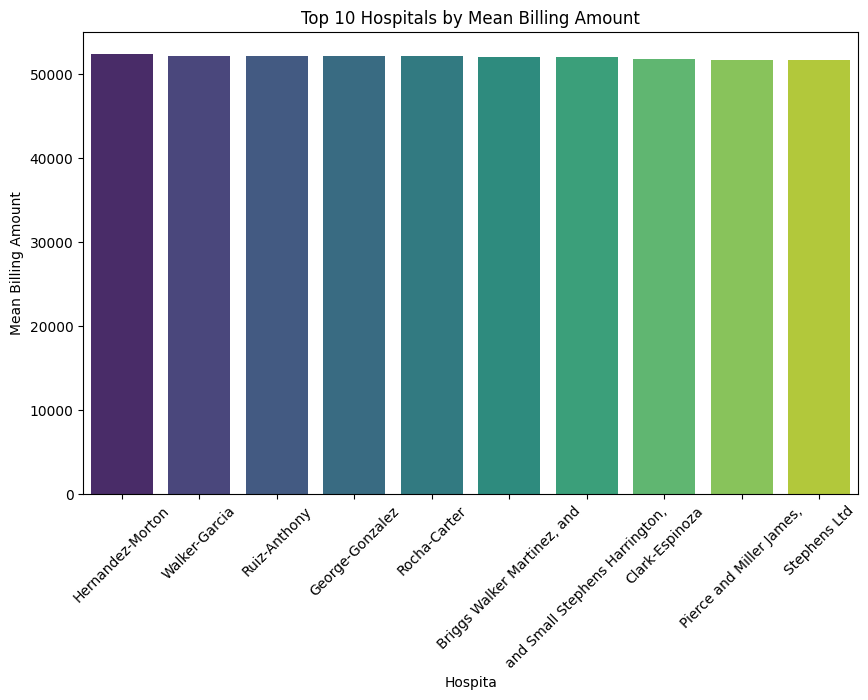

In [48]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 6))
sns.barplot(y='Billing Amount',x='Hospital', data=top_hospitals, palette='viridis')

plt.xlabel('Hospita')
plt.ylabel('Mean Billing Amount')
plt.title('Top 10 Hospitals by Mean Billing Amount')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Sort the average billing amounts
sorted_billing = average_billing.sort_values(ascending=False)

# Get the five most expensive hospitals
most_expensive = sorted_billing.head(5)

# Get the five least expensive hospitals
least_expensive = sorted_billing.tail(5)

print("Most Expensive Hospitals:")
print(most_expensive)

print("\nLeast Expensive Hospitals:")
print(least_expensive)

Most Expensive Hospitals:
Hospital
Hernandez-Morton    52373.03237
Walker-Garcia       52170.03685
Ruiz-Anthony        52154.23772
George-Gonzalez     52102.24089
Rocha-Carter        52092.66990
Name: Billing Amount, dtype: float64

Least Expensive Hospitals:
Hospital
Rowe, Stone and Patterson    49.450117
Wilcox, Parker and White     46.803365
Allen-Allen                  32.626843
Hebert-Wells                 23.727930
Perez Hoover, Moore and       9.238787
Name: Billing Amount, dtype: float64


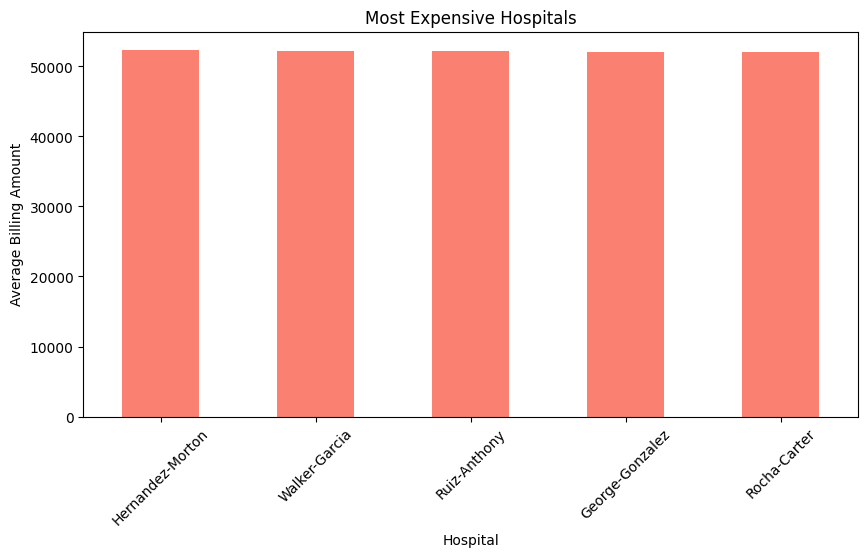

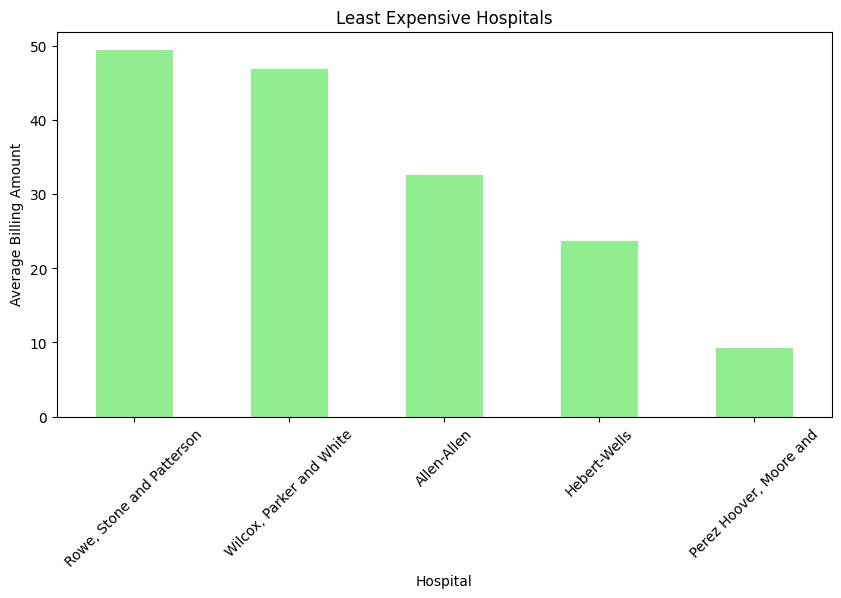

In [27]:
# Bar chart for the most expensive hospitals
plt.figure(figsize=(10, 5))
most_expensive.plot(kind='bar', color='salmon')
plt.title('Most Expensive Hospitals')
plt.xlabel('Hospital')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45)
plt.show()

# Bar chart for the least expensive hospitals
plt.figure(figsize=(10, 5))
least_expensive.plot(kind='bar', color='lightgreen')
plt.title('Least Expensive Hospitals')
plt.xlabel('Hospital')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Grouping by admission type and medical condition, then counting occurrences
admission_medical_counts = df.groupby(['Admission Type', 'Medical Condition']).size().unstack(fill_value=0)
admission_medical_counts

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Admission Type                                                               
Elective                3083    3102    3148      3058          3221     3043
Emergency               3108    3002    3015      3017          3001     3126
Urgent                  3117    3081    3064      3229          3023     3062

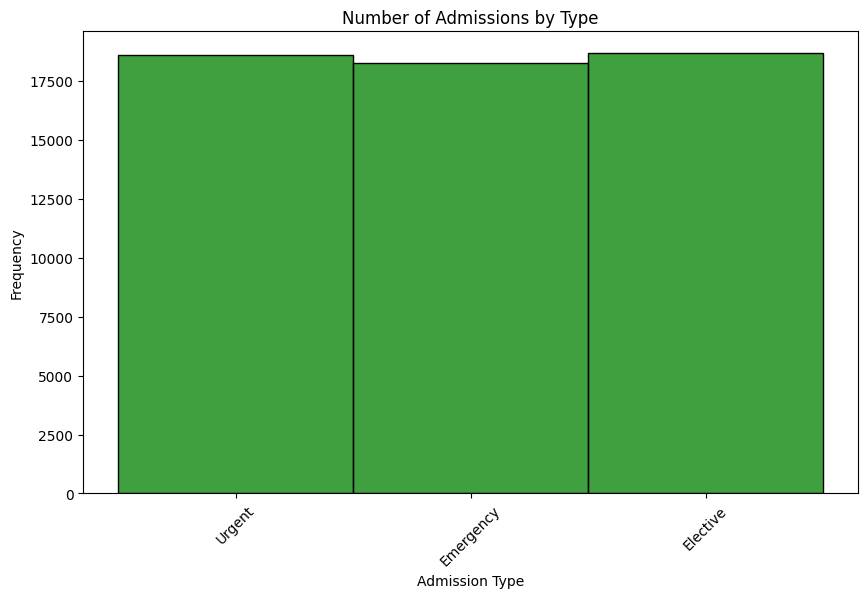

In [29]:
# Histogram for Admission Type Count
plt.figure(figsize=(10, 6))
sns.histplot(df['Admission Type'], kde=False, bins=len(df['Admission Type'].unique()), color='green')

plt.title('Number of Admissions by Type')
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

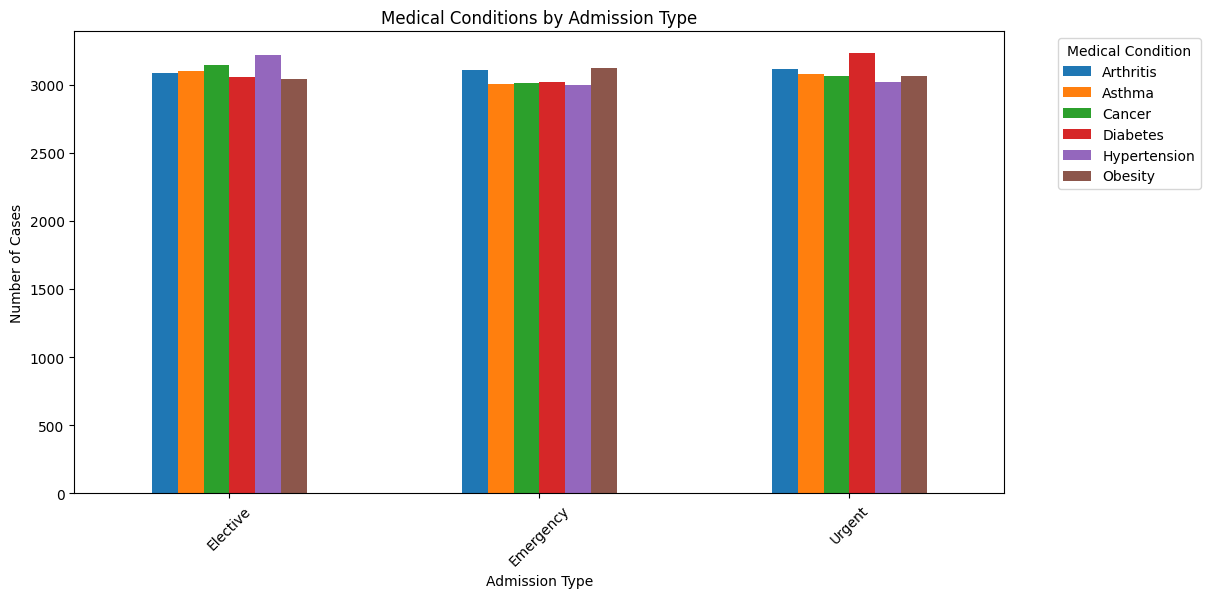

In [64]:
# Plotting the results
admission_medical_counts.plot(kind='bar', figsize=(12, 6))

# Setting titles and labels
plt.title("Medical Conditions by Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)

# Adjusting the legend position
plt.legend(title="Medical Condition", bbox_to_anchor=(1.05, 1), loc='upper left')

# Showing the plot
plt.show()

In [31]:
# Calculate the length of stay in days
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Grouping by admission type and calculating the average length of stay
average_length_of_stay = df.groupby('Admission Type')['Length of Stay'].mean()
average_length_of_stay

Admission Type
Elective     15.525328
Emergency    15.595052
Urgent       15.408000
Name: Length of Stay, dtype: float64

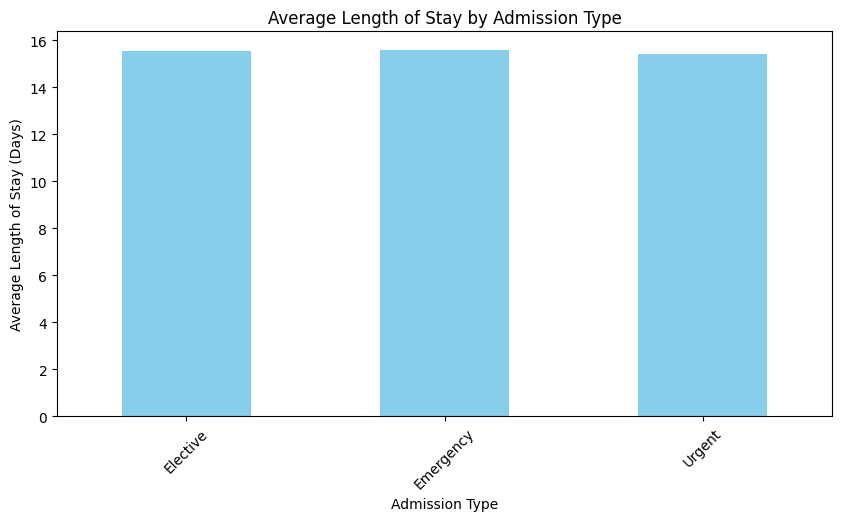

In [32]:
# Plotting the average length of stay
plt.figure(figsize=(10, 5))
average_length_of_stay.plot(kind='bar', color='skyblue')
plt.title('Average Length of Stay by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Average Length of Stay (Days)')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Calculate average billing amount by insurance provider
average_billing_by_insurance = df.groupby('Insurance Provider')['Billing Amount'].mean().sort_values()
average_billing_by_insurance

Insurance Provider
UnitedHealthcare    25433.251833
Cigna               25581.351312
Aetna               25618.128074
Blue Cross          25650.678257
Medicare            25667.298670
Name: Billing Amount, dtype: float64

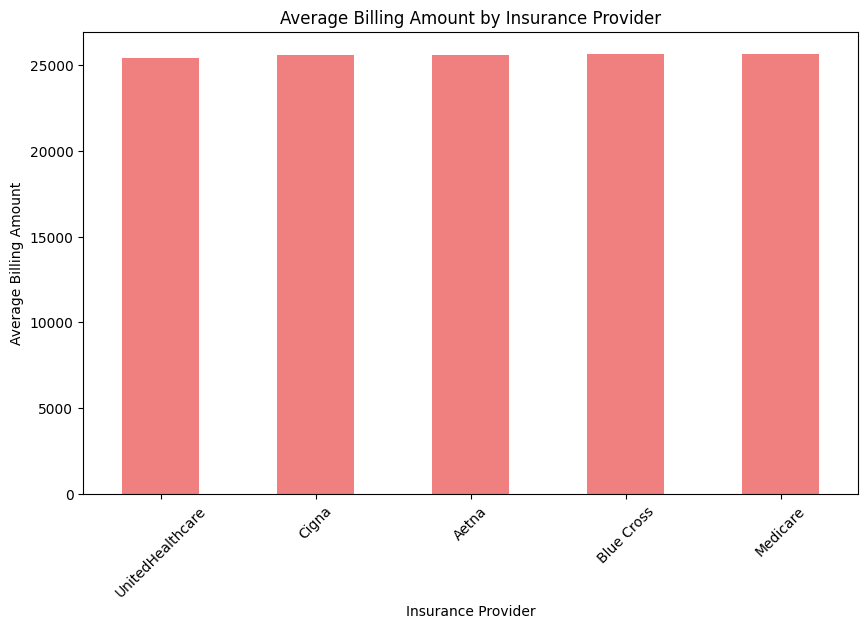

In [35]:
# Plotting the results
plt.figure(figsize=(10, 6))
average_billing_by_insurance.plot(kind='bar', color='lightcoral')
plt.title('Average Billing Amount by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Calculate average billing amount by hospital and insurance provider
billing_by_hospital_insurance = df.groupby(['Hospital', 'Insurance Provider'])['Billing Amount'].mean().unstack()
billing_by_hospital_insurance

Insurance Provider                   Aetna   Blue Cross        Cigna  \
Hospital                                                               
Abbott Inc                             NaN          NaN          NaN   
Abbott Ltd                             NaN          NaN          NaN   
Abbott Moore and Williams,             NaN          NaN          NaN   
Abbott and Thompson, Sullivan          NaN  16738.56976          NaN   
Abbott, Peters and Hoffman             NaN          NaN          NaN   
...                                    ...          ...          ...   
and Zimmerman Sons                     NaN          NaN  32706.65262   
and Zuniga Davis Carlson,      42867.04130          NaN          NaN   
and Zuniga Francis Peterson,   33689.63073          NaN          NaN   
and Zuniga Sons                        NaN  33950.17048          NaN   
and Zuniga Thompson, Blake             NaN          NaN          NaN   

Insurance Provider                Medicare  UnitedHealthcare  
Hospital                                                      
Abbott Inc                     38052.04192               NaN  
Abbott Ltd                             NaN       29877.58648  
Abbott Moore and Williams,             NaN       24799.59634  
Abbott and Thompson, Sullivan          NaN               NaN  
Abbott, Peters and Hoffman     18842.39686               NaN  
...                                    ...               ...  
and Zimmerman Sons                     NaN               NaN  
and Zuniga Davis Carlson,              NaN               NaN  
and Zuniga Francis Peterson,           NaN               NaN  
and Zuniga Sons                        NaN               NaN  
and Zuniga Thompson, Blake             NaN       22067.42876  

[39876 rows x 5 columns]

In [37]:
# Group by medical condition and calculate average length of stay
average_stay_by_condition = df.groupby('Medical Condition')['Length of Stay'].mean()
average_stay_by_condition

Medical Condition
Arthritis       15.517404
Asthma          15.696570
Cancer          15.495827
Diabetes        15.422936
Hypertension    15.458626
Obesity         15.464305
Name: Length of Stay, dtype: float64

In [39]:
# Group by gender and calculate average length of stay
average_stay_by_gender = df.groupby('Gender')['Length of Stay'].mean()
average_stay_by_gender

<ipython-input-39-7dcc4b77ecee>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_stay_by_gender = df.groupby('Gender')['Length of Stay'].mean()


Gender
Female    15.475763
Male      15.542198
Name: Length of Stay, dtype: float64

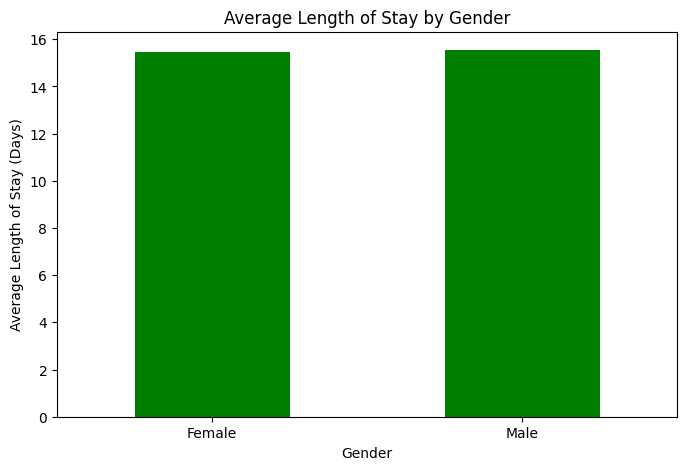

In [40]:
# Plotting the results
plt.figure(figsize=(8, 5))
average_stay_by_gender.plot(kind='bar', color='green')
plt.title('Average Length of Stay by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Length of Stay (Days)')
plt.xticks(rotation=0)
plt.show()

In [41]:
# Group by discharge date and count admissions
admissions_over_time = df['Discharge Date'].value_counts().sort_index()
admissions_over_time

Discharge Date
2019-05-09    1
2019-05-10    4
2019-05-11    2
2019-05-12    6
2019-05-13    6
             ..
2024-06-02    4
2024-06-03    5
2024-06-04    2
2024-06-05    2
2024-06-06    1
Name: count, Length: 1856, dtype: int64

In [42]:
# Pivot table for multivariate analysis
pivot_table = df.pivot_table(index='Age', columns=['Gender', 'Insurance Provider'], values='Billing Amount', aggfunc='mean')

# Displaying pivot table
pivot_table.head()

<ipython-input-42-bd0be8193f87>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='Age', columns=['Gender', 'Insurance Provider'], values='Billing Amount', aggfunc='mean')


Gender                    Female                                            \
Insurance Provider         Aetna    Blue Cross         Cigna      Medicare   
Age                                                                          
13                           NaN           NaN  27152.421495  34310.425307   
14                  20433.136934  41903.828963  39860.504320  23448.170610   
15                  36022.192515  33326.534455  25495.935073  22951.721917   
16                  46899.536910  26846.875960           NaN  21031.774540   
17                           NaN  15345.704803  27427.931408  28413.716408   

Gender                                       Male                              \
Insurance Provider UnitedHealthcare         Aetna    Blue Cross         Cigna   
Age                                                                             
13                              NaN  32900.044480  27460.468015   3014.565852   
14                              NaN           NaN  24926.994639           NaN   
15                     33389.055472  16230.424514  12239.838240  35654.999995   
16                      5327.727617  35500.701913  10955.188814  30172.400070   
17                     27904.345877  25444.123423           NaN           NaN   

Gender                                             
Insurance Provider      Medicare UnitedHealthcare  
Age                                                
13                  26556.188645     35019.774520  
14                  32258.588479              NaN  
15                  43311.534127     24545.951606  
16                  22607.268530     13387.698010  
17                  31149.108900     31532.458824

# ***summary***

**Relationship between medical condition and gender:**


Similar prevalence across genders:
There is no significant difference between the number of females and males for each medical condition.
This suggests that the prevalence of these medical conditions is relatively balanced between the sexes.

**Relationship between medical condition and blood type:**

There is no significant difference by blood type: The counts of each medical condition (e.g., arthritis, asthma, cancer, diabetes, hypertension, and obesity) are quite similar across different blood types. There are no very large differences that are prominent, suggesting that blood type may not play a major role in determining susceptibility to these conditions.
Most common conditions: The conditions with the highest counts among all blood types are diabetes and hypertension, suggesting that these conditions are generally more prevalent in the sample population.
Highest and lowest counts:
Diabetes: Blood type B+ has the highest count (1196), while blood type O- has the lowest count (1122).
High blood pressure: Blood type AB+ has the highest number (1215), while blood type O- has the lowest number (1145). Asthma and obesity: These conditions are relatively evenly distributed among all blood types.                                                                                             
**Hospital Billing Analysis:**


The analysis identifies the hospitals with the highest and lowest average billing amounts. The results show a clear distinction between the most and least expensive hospitals based on their average billing charges.

These hospitals have the highest billing amounts, with Hernandez-Morton being the most expensive. The average charges for these hospitals are all above $52,000.

Least Expensive Hospitals:
Rowe, Stone, and Patterson: $49,450.12



**Infection Trends by Age and Medical Condition:**

1. Cancer:
Highest infection rates are observed in individuals in their mid-fifties.
A significant concentration of infections occurs from the early to late fifties.
Early fifties infections show a correlation with obesity.
2. Diabetes:
Most infections are concentrated in individuals in their late thirties and late forties.
3. Asthma:
Infection rates peak in the mid-twenties and early fifties.
4. High Blood Pressure:
Infection rates rise in the early twenties and again in the early seventies, with noticeable increases also in the late thirties.
5. Joint Disease:
Infection rates are relatively consistent across most ages, but there is a noticeable increase in the late thirties and late fifties.




**Medical Conditions by Admission Type:**


The analysis shows how different medical conditions are distributed across three types of hospital admissions: Elective, Emergency, and Urgent.

Elective Admissions: For elective admissions, conditions such as cancer and diabetes have relatively high occurrence rates. This indicates that many patients are likely planning their hospital stays for treatments or management of chronic conditions.

Emergency Admissions: Emergency admissions see high occurrences for conditions like asthma and hypertension. This suggests that these medical conditions often require urgent intervention, potentially due to sudden complications or exacerbations.

Urgent Admissions: Urgent admissions also have a notable number of cases for conditions such as obesity and diabetes, indicating that these conditions may lead to health emergencies that necessitate immediate care but are less sudden than typical emergencies.



**Billing amounts and insurance company:**

From this data, we can observe that the billing amounts are quite similar across different insurance providers, with only slight variations. Medicare seems to have the highest average billing amount, while UnitedHealthcare has the lowest.

# ***conclusion***

In conclusion, this analysis provides valuable insights into the relationships between medical conditions, demographics, hospital billing, and admission types. The findings reveal that gender and blood type have little impact on the prevalence of common medical conditions, while hospital billing varies significantly between institutions. Additionally, the distribution of medical conditions across admission types emphasizes the need for both planned and urgent care in managing chronic diseases. These results can help healthcare providers and policymakers better understand patterns in medical care, ultimately improving patient outcomes and resource allocation.